# NoSQL Project "Find your Meal"

"Find Your Meal" is something I created to help people who follow keto or vegan diets. I've noticed how tricky it can be to plan meals, especially when everyone wants different things. My idea is to make it easier. 

I built a big database for this. It uses MongoDB's aggregation pipelines, which basically means you can search through lots of meal options super fast and find exactly what you're looking for.

So, basically, "Find Your Meal" is about taking the stress out of deciding what to eat. It's all about making meal choices easy and fun.

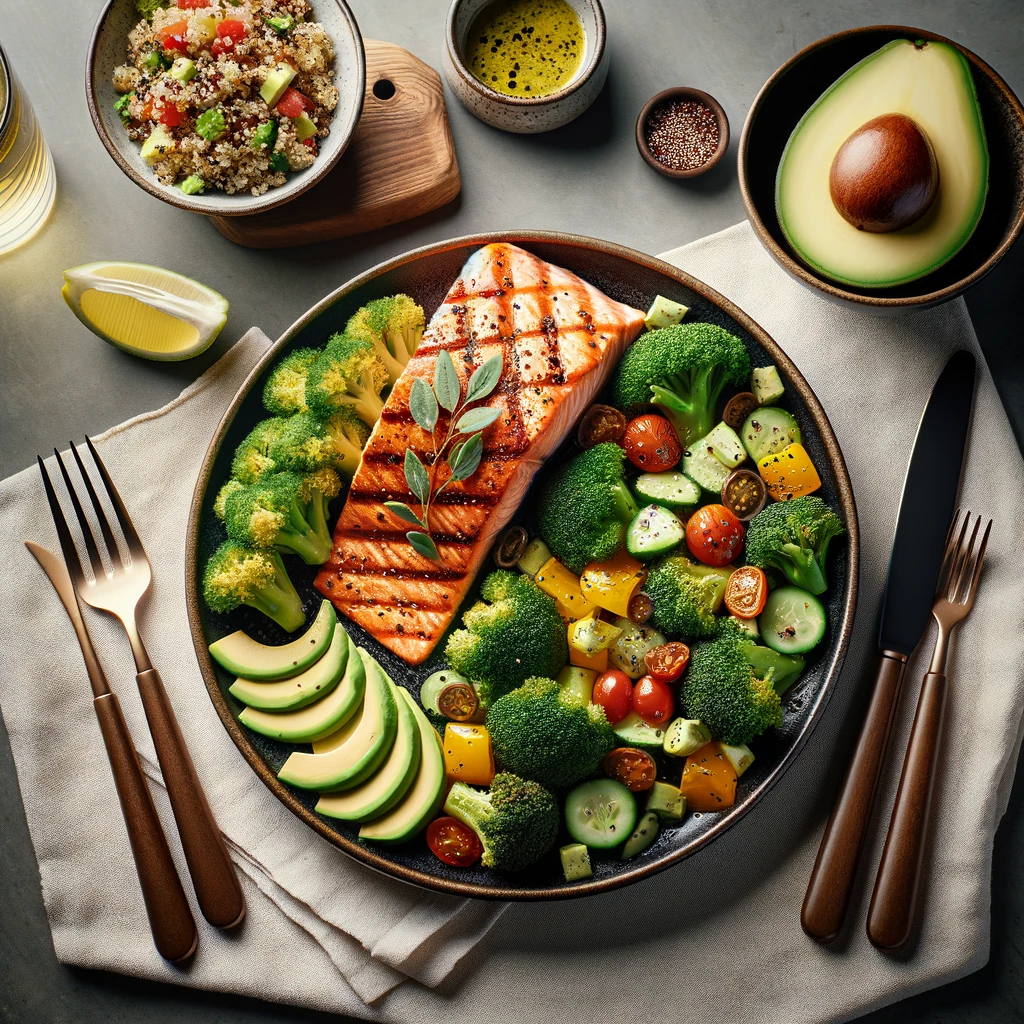

In [89]:
from IPython.display import Image, display

# Displaying the image of the keto and vegan meal in the Jupyter Notebook
meal_image_path = '/Users/elals/Desktop/dalle.png'
display(Image(meal_image_path))


## Table of Contents

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
  <ul class="toc-item">
    <li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li>
    <li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span>
      <ul class="toc-item">
        <li><span><a href="#Data-Sources-&amp;-System-Architecture" data-toc-modified-id="Data-Sources-&amp;-System-Architecture-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Sources &amp; System Architecture</a></span></li>
        <li><span><a href="#Personas" data-toc-modified-id="Personas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Personas</a></span></li>
        <li><span><a href="#Data-Model" data-toc-modified-id="Data-Model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Model</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Requirements-&amp;-Configuration" data-toc-modified-id="Requirements-&amp;-Configuration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Requirements &amp; Configuration</a></span>
      <ul class="toc-item">
        <li><span><a href="#Database-Overview" data-toc-modified-id="Database-Overview-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Database Overview</a></span></li>
      </ul>
    </li>
    <li><span><a href="#ELT-Process" data-toc-modified-id="ELT-Process-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ELT Process</a></span>
      <ul class="toc-item">
        <li><span><a href="#Insert-JSON-into-MongoDB" data-toc-modified-id="Insert-JSON-into-MongoDB-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Insert JSON into MongoDB</a></span></li>
        <li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li>
      </ul>
    </li>
    <li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Analysis</a></span>
      <ul class="toc-item">
        <li><span><a href="#Olivia" data-toc-modified-id="Olivia-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Olivia</a></span>
          <ul class="toc-item">
            <li><span><a href="#The-Perfect-Meals-for-Olivia" data-toc-modified-id="The-Perfect-Meals-for-Olivia-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>The Perfect Meals for Olivia</a></span></li>
            <li><span><a href="#The-Most-Popular-Vegan-Ingredients" data-toc-modified-id="The-Most-Popular-Vegan-Ingredients-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>The Most Popular Vegan Ingredients</a></span></li>
            <li><span><a href="#The-Shortest-Vegan-Recipe" data-toc-modified-id="The-Shortest-Vegan-Recipe-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>The Shortest Vegan Recipe</a></span></li>
          </ul>
        </li>
        <li><span><a href="#Lukas" data-toc-modified-id="Lukas-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Lukas</a></span>
          <ul class="toc-item">
            <li><span><a href="#The-Perfect-Meals-for-Lukas" data-toc-modified-id="The-Perfect-Meals-for-Lukas-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>The Perfect Meals for Lukas</a></span></li>
            <li><span><a href="#The-Most-Popular-Keto-Ingredients" data-toc-modified-id="The-Most-Popular-Keto-Ingredients-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>The Most Popular Keto Ingredients</a></span></li>
            <li><span><a href="#The-Shortest-Keto-Recipe" data-toc-modified-id="The-Shortest-Keto-Recipe-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>The Shortest Keto Recipe</a></span></li>
          </ul>
        </li>
        <li><span><a href="#Recipe-Complexity" data-toc-modified-id="Recipe-Complexity-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Recipe Complexity</a></span></li>
      </ul>
    </li>
      <li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span>
      <ul class="toc-item">
        <li><span><a href="#Summary-and-Reflection" data-toc-modified-id="Summary-and-Reflection-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Summary and Reflection</a></span></li>
        <li><span><a href="#Learnings" data-toc-modified-id="Learnings-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Learnings</a></span></li>
        <li><span><a href="#Next-steps" data-toc-modified-id="Next-steps-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Next steps</a></span></li>
      </ul>
    </li>
  </ul>
</div>



## Overview

First off, I'll give you a quick overview of how our system is set up. Then, I'll tell you about the different people who will use our system, calling them 'personas'. After that, I'll show you how our data is organized. The main part of the report will be the analysis where we dig into the details and find out what's going on. To wrap things up, I’ll summarize everything we learned and talk about what we could do next if we keep the project going

	
### Data Sources & System Architecture

I pull recipe data automatically using a script from the "low-carb-recipes" API on RapidAPI, found here: https://rapidapi.com/dfskGT/api/low-carb-recipes. This gives me access to a wide variety of keto recipes with detailed nutrition info.

On my computer, I use Python in a virtual environment and Jupyter Notebooks to process the data, which I then manage with MongoDB Compass. This setup syncs seamlessly with my cloud storage on MongoDB Atlas.

As for usage, I am working within a free plan that limits me to 300 API requests per month, pacing at a maximum of one request per second.

### Personas

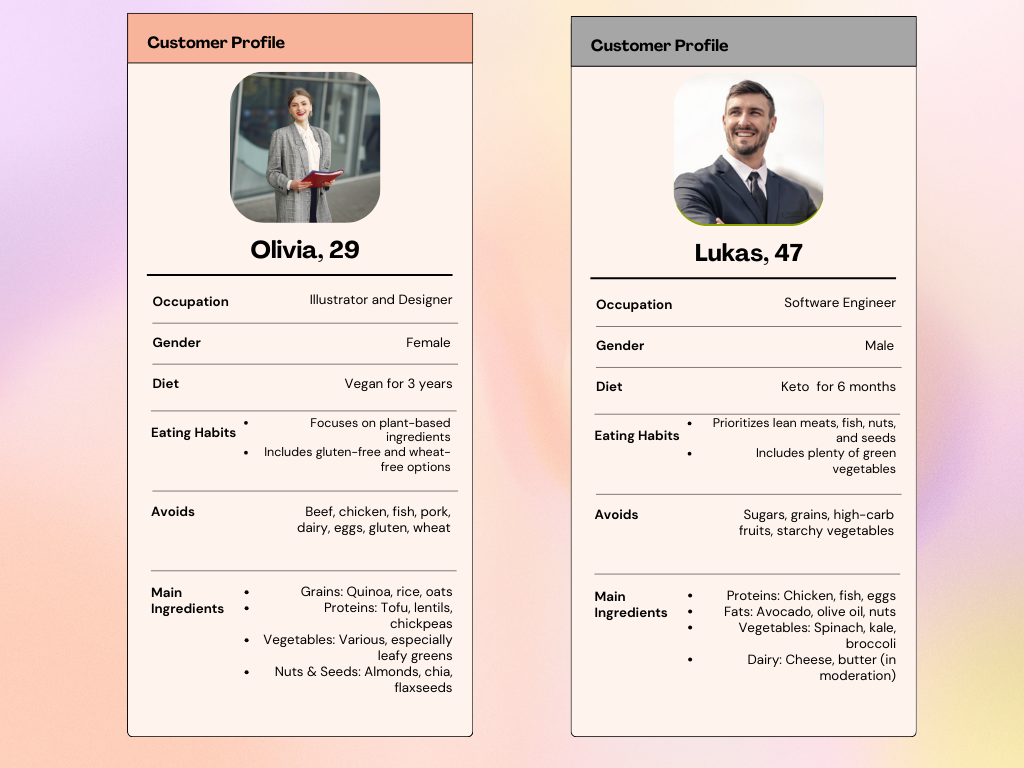

In [121]:
# Displaying the image of personnas created by Canvas
personnas_image_path = '/Users/elals/Desktop/personnas.png'
display(Image(personnas_image_path))

The aggregation pipelines will be constructed tailored to their specific requirements. Additionally, I will delve into statistics and visualizations that cater to the interests of each individual. These statistics will be utilized to drive data-driven decisions, helping to identify the ideal meals for them.

### Data Model

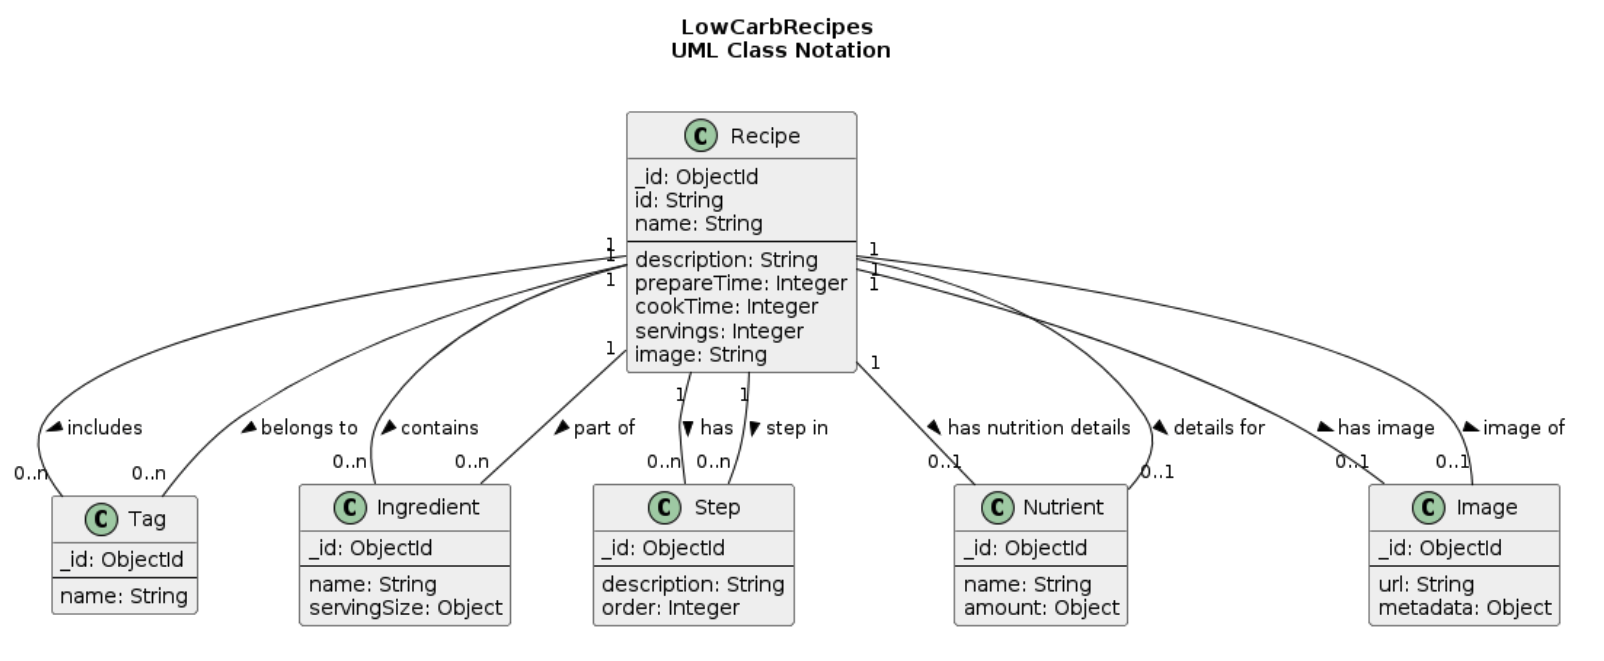

In [90]:
# Displaying the Data Model
personnas_image_path = '/Users/elals/Desktop/model.png'
display(Image(personnas_image_path))

Data Model Description:

**Recipe Collection**

The recipe collection houses the primary data for each culinary entry. Each record contains a mix of simple fields and nested structures, like arrays or objects. Here's how the transformation took place:

- Fields such as `tags`, `ingredients`, and `steps` were initially provided as arrays and were kept in the same format to facilitate the retrieval of these multi-valued characteristics.
- The `nutrients` field is a reference to an object in the nutrients collection, which captures detailed nutritional data for each recipe.
- The `image` field stores either a URL string or a reference to an entry in the images collection.
- Additional fields such as `prepareTime` and `cookTime` are integers representing the time in minutes required for preparation and cooking, respectively.
- The `name` field is a string that denotes the title of the recipe, for instance, "Keto Corn Dog Bites".

The transformation involved ensuring consistency and usability, like breaking down a complex string into more accessible, query-friendly formats.

**Tags, Ingredients, Steps Collections**

Each of these collections holds specific attributes of a recipe:

- Tags are simple, with each tag having a unique identifier and a name.
- Ingredients include a name and a nested serving size object, which details the quantity and measurement units.
- Steps are listed with an order integer to maintain the sequence of instructions and a text description for each step.

**Nutrients Collection**

This collection holds a flat structure where each entry represents the nutritional profile of a recipe and contains an object with various nutrient fields like carbohydrates, proteins, fats, vitamins, and minerals.

**Images Collection**

The images collection is tied to the recipes, storing the links to pictures along with additional metadata that may include dimensions, photographer credit, or related annotations.

**Overall Data Integration**

Throughout all collections, data was standardized and cleansed to ensure uniformity:

- Duplicate data entries were identified and removed.


## Requirements and Configuration

The technical requirements to configure the database.

In [2]:
# Import libraries
import pymongo
from pprint import pprint
from pymongo import MongoClient
import pandas as pd
import requests
import json
import csv
import time
import os
from dotenv import load_dotenv
from bson.regex import Regex
from IPython.display import Image
import re
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

ModuleNotFoundError: No module named 'pymongo'

In [2]:
# Pandas configuration
pd.set_option('display.width', 1500)
pd.set_option('display.max_rows', 200)
pd.set_option("display.max_colwidth", 80)

In [3]:
# API and Database details
API_Key = "76afa843bemshf6483814d18ef32p113122jsn63d01609e486"
API_URL = "https://low-carb-recipes.p.rapidapi.com/search"
headers={'X-RapidAPI-Key': '76afa843bemshf6483814d18ef32p113122jsn63d01609e486'}

CNX_STR = "localhost:27017"
DB_NAME = "lowrecipes"



In [ ]:
# Load environment variables from the .env file
load_dotenv()

# Retrieve secrets from environment variables
API_KEY = os.getenv("API_KEY")
API_URL = os.getenv("API_URL")
DB_CONNECTION = os.getenv("DB_CONNECTION")
DB_NAME = os.getenv("DB_NAME")

# Use the secrets
headers = {'X-RapidAPI-Key': API_KEY}

print(f"API URL: {API_URL}")
print(f"Database Connection: {DB_CONNECTION}, Database Name: {DB_NAME}")

In [91]:
# Requests Recipe API 
params = {"tags": "beverages", "limit": 20, "page": 1}  

response = requests.get(API_URL, headers=headers, params=params)

print(response.text[0:500])

print(50*"*")

[{"id":"ccef957b-351f-4c14-b33c-ef050045b877","name":"Keto Vanilla Butter Latte","tags":["beef-free","beverages","breakfast","chicken-free","egg-free","fish-free","gluten-free","keto","lchf","peanut-free","pork-free","quick-easy","relevant-meal--beverages","shellfish-free","soy-free","vegetarian","wheat-free"],"description":"This creamy Keto vanilla BULLETPROOF® coffee recipe is rich in fats, frothy plant-based milk, and a hint of sweet vanilla. This Keto vanilla butter coffee makes a great fat-
**************************************************


In [5]:
# Connection to MongoDB
client = pymongo.MongoClient(CNX_STR)
db = client[DB_NAME]

# Collections:
lowrecipes = db["recipes"]

### DB Overview 

In [93]:
dbs = pd.DataFrame(client.list_databases())
print("The following databases are in Mongo DB:")
print(dbs)
print(40 * "*")
print("The following collection is in lowcarbrecipes database:")
print(db.list_collection_names())

The following databases are in Mongo DB:
             name  sizeOnDisk  empty
0           admin       40960  False
1          config      110592  False
2           local       81920  False
3  lowcarbrecipes    10145792  False
4          mealdb       86016  False
5  recipeslowcarb     7114752  False
****************************************
The following collection is in lowcarbrecipes database:
[]


## ELT Process

This chapter will explain the ELT pipeline. I'll provide the necessary code along with a few explanations where needed.

### Insert JSON into MongoDB


The first step is to fetch data as json file from an API and insert it into the MongoDB.



### recipes:

Reset collection

In [95]:
lowrecipes.drop()
lowrecipes.count_documents({})

0

Fetch Data


In [97]:
# Fetch JSON from API_URL
def fetch_all_recipes(tag, max_recipes=2000):
    all_recipes = []
    page = 1
    limit = 20
    total_fetched = 0

    while total_fetched < max_recipes:
        params = {
            'tags': tag,
            'limit': limit,
            'page': page
        }
        response = requests.get(API_URL, headers=headers, params=params)

        if response.status_code == 200:
            recipes = response.json()
            if not recipes:  # No more recipes available
                break
            all_recipes.extend(recipes)
            total_fetched += len(recipes)
            if total_fetched >= max_recipes:
                break
            page += 1
        elif response.status_code == 200:
            print("Rate limit reached. Waiting before retrying...")
            time.sleep(1)
            continue
        else:
            print(f"Error fetching page {page} for tag '{tag}': {response.status_code}")
            break  # Or handle this error appropriately

        time.sleep(1)  # A short delay between requests to avoid hitting rate limits

    return all_recipes[:max_recipes]

tags = ["vegan", "keto"]
for tag in tags:
    recipes = fetch_all_recipes(tag)
    print(f"Fetched {len(recipes)} recipes for tag {tag}.")
    save_to_mongo(recipes, lowrecipes)
    print(f"Recipes for tag {tag} saved successfully.")

def save_to_mongo(data, collection):
    if data:
        collection.insert_many(data)

Fetched 2000 recipes for tag vegan.
Recipes for tag vegan saved successfully.
Error fetching page 97 for tag 'keto': 429
Fetched 1920 recipes for tag keto.
Recipes for tag keto saved successfully.


Inspect

In [98]:
# Count number of documents inserted
lowrecipes.count_documents({})

3920

In [104]:
lowrecipes.index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]}}

In [106]:
print(lowrecipes.find_one({"prepareTime": 5}).keys())

dict_keys(['_id', 'id', 'name', 'tags', 'description', 'prepareTime', 'cookTime', 'ingredients', 'steps', 'servings', 'servingSizes', 'nutrients', 'image'])


In [107]:
lowrecipes.find_one({})

{'_id': ObjectId('6615acb288fc5d1d6cea2aea'),
 'id': 'a867707a-0cad-4a7a-99d6-7efc1d3f92a9',
 'name': 'Keto Chocolate, Orange and Ginger Smoothie',
 'tags': ['beef-free',
  'beverages',
  'breakfast',
  'chicken-free',
  'dairy-free',
  'egg-free',
  'fish-free',
  'gluten-free',
  'keto',
  'lchf',
  'peanut-free',
  'pork-free',
  'quick-easy',
  'relevant-meal--beverages',
  'shellfish-free',
  'soy-free',
  'vegan',
  'vegetarian',
  'wheat-free'],
 'description': 'This delicious Keto smoothie is loaded with fats and flavor and is perfectly smooth and creamy. Our simple low-carb smoothie is prepared with coconut cream, almond milk, smooth almond butter, warming ginger, unsweetened cocoa powder, a little sugar-free sweetener, and a touch of orange extract. This sweet Keto beverage is perfectly served as a satiating breakfast or as a daytime treat!\n\n### What kind of coconut cream should you use?\n\nWe have used canned coconut milk, typically used for cooking, in this low-carb smoot

In [108]:
print(lowrecipes.count_documents({"prepareTime": 5}))
print(lowrecipes.find_one({"prepareTime": 5}))

792
{'_id': ObjectId('6615acb288fc5d1d6cea2aeb'), 'id': '1a69a125-7c33-4664-b4c2-f4fdddab8781', 'name': 'Keto Green Beans and Scallions', 'tags': ['beef-free', 'chicken-free', 'dairy-free', 'egg-free', 'fish-free', 'gluten-free', 'keto', 'lchf', 'peanut-free', 'pork-free', 'relevant-meal--sides', 'shellfish-free', 'soy-free', 'tree-nut-free', 'vegan', 'vegetarian', 'wheat-free'], 'description': 'These aromatic green beans are cooked with tender scallions, spicy chili flakes, a hint of zesty lime and sesame oil.\n\nThese are a great accompaniment to Asian inspired dishes or grilled fish.', 'prepareTime': 5, 'cookTime': 12, 'ingredients': [{'name': 'Green Beans (string Beans), Raw', 'servingSize': {'units': 'ounce', 'desc': '5 ounce', 'qty': 5.0, 'grams': 142.0, 'scale': 1.417}}, {'name': 'Lime Juice, Fresh', 'servingSize': {'units': 'teaspoon', 'desc': '2 teaspoon', 'qty': 2.0, 'grams': 10.0, 'scale': 2.0}}, {'name': 'Scallions', 'servingSize': {'units': 'medium - 4 1/8" long', 'desc': 

In [125]:
c = lowrecipes.aggregate([
      {"$limit": 10},
])

pd.DataFrame(c)

,_id,id,name,tags,description,prepareTime,cookTime,ingredients,steps,servings,servingSizes,nutrients,image
0,6615acb288fc5d1d6cea2aea,a867707a-0cad-4a7a-99d6-7efc1d3f92a9,"Keto Chocolate, Orange and Ginger Smoothie","[beef-free, beverages, breakfast, chicken-free, dairy-free, egg-free, fish-f...",This delicious Keto smoothie is loaded with fats and flavor and is perfectly...,8,0,"[{'name': 'Almond Butter, Unsalted', 'servingSize': {'units': 'tablespoon', ...",[Scoop the chilled coconut cream from the top of the can of coconut milk and...,1,"[{'scale': 1.0, 'qty': 1.0, 'grams': 252.315, 'units': 'smoothie', 'original...","{'caloriesKCal': 356.722, 'caloriesKJ': 1115.967, 'totalCarbs': 21.043, 'dia...",https://tinyurl.com/2p82zzca/a867707a-0cad-4a7a-99d6-7efc1d3f92a9.png
1,6615acb288fc5d1d6cea2aeb,1a69a125-7c33-4664-b4c2-f4fdddab8781,Keto Green Beans and Scallions,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, keto...","These aromatic green beans are cooked with tender scallions, spicy chili fla...",5,12,"[{'name': 'Green Beans (string Beans), Raw', 'servingSize': {'units': 'ounce...",[Add the green beans to a pan of boiling water and simmer for 4-5 minutes un...,4,"[{'scale': 1.0, 'qty': 1.0, 'grams': 32.602, 'units': 'servings'}]","{'caloriesKCal': 70.591, 'caloriesKJ': 295.351, 'totalCarbs': 3.578, 'diabet...",https://tinyurl.com/2p82zzca/1a69a125-7c33-4664-b4c2-f4fdddab8781.png
2,6615acb288fc5d1d6cea2aec,682207ec-7c88-4eb4-84d8-ddd1703d9346,Low Carb Spiced Bok Choy and Broccoli Soup,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, lchf...","This warming soup is packed with low carb broccoli and Bok choy, aromatic cu...",8,13,"[{'name': 'Vegetable Broth, Bouillon Or Consomme', 'servingSize': {'units': ...",[Thinly slice the shallot and garlic. Heat the oil in a large saucepan over ...,4,"[{'scale': 1.0, 'qty': 1.0, 'grams': 184.275, 'units': 'servings'}]","{'caloriesKCal': 68.0, 'caloriesKJ': 217.569, 'totalCarbs': 6.005, 'diabetes...",https://tinyurl.com/2p82zzca/682207ec-7c88-4eb4-84d8-ddd1703d9346.png
3,6615acb288fc5d1d6cea2aed,ec65c0d4-07a5-4e28-b16e-7588f9aa27c6,Keto Salted Pistachio Butter,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, kid-...",Peanut butter is delicious but healthier for you is this Salted Pistachio Bu...,15,0,"[{'name': 'Roasted Shelled Pistachios With Sea Salt ', 'servingSize': {'unit...",[Add the shelled salted and roasted pistachios to the bottom of a large food...,1,"[{'scale': 1.0, 'qty': 1.0, 'grams': 14.17, 'units': 'serving'}]","{'caloriesKCal': 1239.21, 'caloriesKJ': 5184.855, 'totalCarbs': 24.0, 'diabe...",https://tinyurl.com/2p82zzca/ec65c0d4-07a5-4e28-b16e-7588f9aa27c6.png
4,6615acb288fc5d1d6cea2aee,1cff7f74-859c-4e56-9ccf-fcd3d9453bf0,Keto Zucchini Noodle Salad,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, keto...","This tangy zucchini noodle salad is packed with low carb veggies, toasted se...",16,4,"[{'name': 'Radish, Raw', 'servingSize': {'units': 'medium - 3/4"" to 1"" diame...",[Slice the ends off the zucchini and peel the outer skin. Discard. Peel the ...,2,"[{'scale': 1.0, 'qty': 1.0, 'grams': 155.925, 'units': 'servings'}]","{'caloriesKCal': 92.683, 'caloriesKJ': 387.784, 'totalCarbs': 6.744, 'diabet...",https://tinyurl.com/2p82zzca/1cff7f74-859c-4e56-9ccf-fcd3d9453bf0.png
5,6615acb288fc5d1d6cea2aef,e77c981f-193e-42d6-b250-47150568c661,"Keto Tahini, Tamari Mushrooms","[beef-free, chicken-free, dairy-free, egg-free, fish-free, keto, lchf, peanu...",These simple mushrooms are pan fried until tender then tossed with creamy ta...,3,8,"[{'name': 'Mushrooms', 'servingSize': {'units': 'medium', 'desc': '6 medium'...",[Melt the coconut oil in a skillet over a medium heat. Thinly slice the mush...,2,"[{'scale': 1.0, 'qty': 1.0, 'grams': 66.623, 'units': 'servings'}]","{'caloriesKCal': 91.746, 'caloriesKJ': 383.864, 'totalCarbs': 2.683, 'diabet...",https://tinyurl.com/2p82zzca/e77c981f-193

We will now explore the method to display a sample image of a meal within a Jupyter Notebook environment.

In [119]:
# Retrieve the document
recipe_doc = lowrecipes.find_one(filter={"id": "1a69a125-7c33-4664-b4c2-f4fdddab8781"})
image_url = recipe_doc["image"]

Image(url=image_url, width=500, height=500)


## Cleaning 

### Check for Duplicates

In [131]:
# Aggregation pipeline to find duplicates
pipeline = [
    {
        "$group": {
            "_id": {"name": "$name"},
            "duplicates": { "$addToSet": "$_id" },
            "count": { "$sum": 1 }
        }
    },
    {
        "$match": {
            "count": { "$gt": 1 }
        }
    }
]

cursor = lowrecipes.aggregate(pipeline)
counter = 0

# Iterate through the cursor and count duplicates
for recipe in cursor:
    counter += 1
    print(recipe)

# Check if duplicates were found
if counter == 0:
    print("Found no duplicates for the field 'name'")
else:
    print(f"Found duplicates for the 'name' field - {counter} groups")

print("Duplicates are not desirable.")

{'_id': {'name': 'Keto Salted Pistachio Butter'}, 'duplicates': [ObjectId('6615acb288fc5d1d6cea308d'), ObjectId('6615acb288fc5d1d6cea2fd9'), ObjectId('6615acb288fc5d1d6cea2aed'), ObjectId('6615acb288fc5d1d6cea2d31'), ObjectId('6615acb288fc5d1d6cea2de5'), ObjectId('6615acb288fc5d1d6cea3029'), ObjectId('6615acb288fc5d1d6cea2e99'), ObjectId('6615acb288fc5d1d6cea3191'), ObjectId('6615acb288fc5d1d6cea30dd'), ObjectId('6615acb288fc5d1d6cea2ba1'), ObjectId('6615acb288fc5d1d6cea3245'), ObjectId('6615acb288fc5d1d6cea2c55'), ObjectId('6615acb288fc5d1d6cea2f4d'), ObjectId('6615acb288fc5d1d6cea2ca5'), ObjectId('6615acb288fc5d1d6cea2f9d'), ObjectId('6615acb288fc5d1d6cea2d59'), ObjectId('6615acb288fc5d1d6cea3051'), ObjectId('6615acb288fc5d1d6cea2e0d'), ObjectId('6615acb288fc5d1d6cea2ec1'), ObjectId('6615acb288fc5d1d6cea3105'), ObjectId('6615acb288fc5d1d6cea2b15'), ObjectId('6615acb288fc5d1d6cea2bc9'), ObjectId('6615acb288fc5d1d6cea31b9'), ObjectId('6615acb288fc5d1d6cea326d'), ObjectId('6615acb288fc5

3883 recipes that appeared more than once in the recipe collection will be removed to keep things tidy and avoid confusion

### Delete all Duplicates Values

In [136]:
# Identify duplicates
cursor = lowrecipes.aggregate(pipeline)

# Iterate through the duplicates and delete all but the first one
for group in cursor:
    if len(group["duplicates"]) > 1:
        # All except the first item should be deleted
        to_be_deleted = group["duplicates"][1:]  
        lowrecipes.delete_many({"_id": {"$in": to_be_deleted}})

print("Duplicate deletion completed.")

Duplicate deletion completed.


In [138]:
# Verification for "Keto Green Beans and Scallions"
print("Verification for 'Keto Green Beans and Scallions':")
for recipe in lowrecipes.find({"name": "Keto Green Beans and Scallions"}):
    print(recipe)

Verification for 'Keto Green Beans and Scallions':
{'_id': ObjectId('6615ada288fc5d1d6cea3723'), 'id': '1a69a125-7c33-4664-b4c2-f4fdddab8781', 'name': 'Keto Green Beans and Scallions', 'tags': ['beef-free', 'chicken-free', 'dairy-free', 'egg-free', 'fish-free', 'gluten-free', 'keto', 'lchf', 'peanut-free', 'pork-free', 'relevant-meal--sides', 'shellfish-free', 'soy-free', 'tree-nut-free', 'vegan', 'vegetarian', 'wheat-free'], 'description': 'These aromatic green beans are cooked with tender scallions, spicy chili flakes, a hint of zesty lime and sesame oil.\n\nThese are a great accompaniment to Asian inspired dishes or grilled fish.', 'prepareTime': 5, 'cookTime': 12, 'ingredients': [{'name': 'Green Beans (string Beans), Raw', 'servingSize': {'units': 'ounce', 'desc': '5 ounce', 'qty': 5.0, 'grams': 142.0, 'scale': 1.417}}, {'name': 'Lime Juice, Fresh', 'servingSize': {'units': 'teaspoon', 'desc': '2 teaspoon', 'qty': 2.0, 'grams': 10.0, 'scale': 2.0}}, {'name': 'Scallions', 'servingSi

Duplicates are cleaned now.

In [139]:
# Count number of documents inserted
lowrecipes.count_documents({})

37

In [ ]:
# Fields to check for missing values
fields_to_check = ["name", "ingredients", "description", "prepareTime", "cookTime", 
                   "tags", "steps", "servings", "nutrients", "image"]


counter = 0
for recipe in lowrecipes.find(projection={field: 1 for field in fields_to_check}, 
                          filter={"$or": [{field: {"$exists": False}} for field in fields_to_check]}):
    pprint(recipe)
    counter += 1 

print("The total number of documents with missing values is:", counter)

No missing values

## Data Analysis

In this chapter, I'll be focusing on coming up with recipes specifically designed for those who follow vegan and keto diets. I'll look at the nutritional values and find ways to present this information through clear visual aids. The goal is to help vegan and keto dieters easily find recipes that meet their needs. I will provide a thorough breakdown of ingredients, point out their health benefits, and explain simple cooking methods that stay true to vegan and keto guidelines.

### Olivia

The requirements for the diet of Olivia:

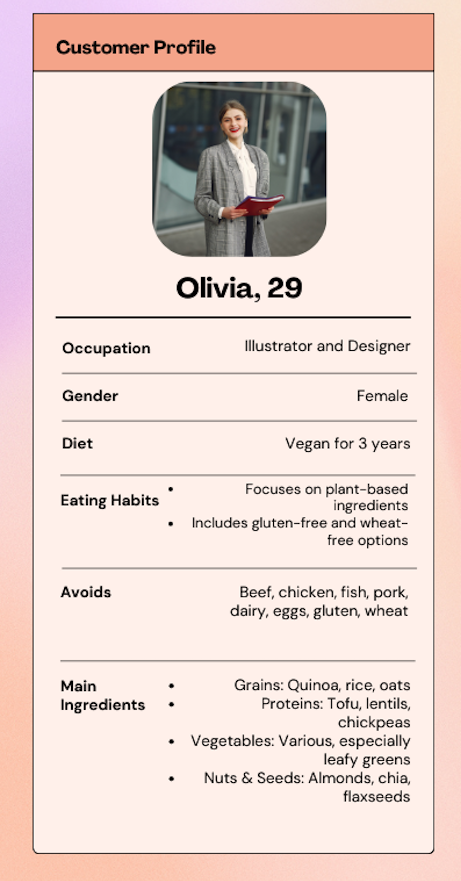

In [145]:
# Displaying the image of personnas created by Canvas
personnas_image_path = '/Users/elals/Desktop/olivia.png'
display(Image(personnas_image_path))

### The Perfect Meals for Olivia

In [56]:
# Define the order of columns for the final DataFrame
recipe_order = ['name', 'tags', 'description', 'prepareTime', 'cookTime', 
                      'ingredients', 'steps', 'servings', 'nutrients', 'image']

 
project = {
    "$project": {
        "_id": 0,
        "id": 1,
        "name": 1,
        "tags": {"$reduce": {
            "input": "$tags",
            "initialValue": "",
            "in": {"$concat": ["$$value", " ", "$$this"]}
        }},
        "description": 1,
        "prepareTime": 1,
        "cookTime": 1,
        "ingredients": {"$reduce": {
            "input": "$ingredients.name",
            "initialValue": "",
            "in": {"$concat": ["$$value", ", ", "$$this"]}
        }},
        "steps": {"$reduce": {
            "input": "$steps",
            "initialValue": "",
            "in": {"$concat": ["$$value", " ", "$$this"]}
        }},
        "servings": 1,
        "nutrients": 1,
        "image": 1
    }
}


match = {
    "$match": {
        "tags": "vegan"  
    }
}


sort = {
    "$sort": {
        "name": 1  
    }
}


limit = {
    "$limit": 20
}

# Assemble the pipeline
pipeline = [match, project, sort, limit]

cursor = lowrecipes.aggregate(pipeline)

vegan_recipes_df = pd.DataFrame(cursor)

vegan_recipes_df = vegan_recipes_df.reindex(columns=recipe_order)

vegan_recipes_df


,name,tags,description,prepareTime,cookTime,ingredients,steps,servings,nutrients,image
0,Easy Keto Spaghetti Sauce,beef-free chicken-free dairy-free egg-free fish-free gluten-free keto kid-f...,With every spaghetti sauce on the market full of sugars or high fructose cor...,5,10,", Extra Virgin Olive Oil, Garlic, Organic Crushed Tomatoes by Full Circle, C...",Preheat a medium sized saute pan over medium-high heat until hot. Add the o...,15,"{'caloriesKCal': 37.718, 'caloriesKJ': 157.813, 'totalCarbs': 4.42, 'diabete...",https://tinyurl.com/2p82zzca/a7071e93-b32f-4b7c-8e56-421fff05edd5.png
1,Keto Air Fryer Flour Salted Pecans,beef-free chicken-free dairy-free egg-free fish-free gluten-free kid-friend...,These Keto Air Fryer Flour Salted Pecans do not have flour in the name becau...,5,40,", Pecans, raw, Salt, sea salt",Add the pecans to the bottom of an air fryer basket and set the machine to ...,8,"{'caloriesKCal': 256.534, 'caloriesKJ': 1073.34, 'totalCarbs': 5.145, 'diabe...",https://tinyurl.com/2p82zzca/02d84471-1a94-473b-be96-2b93fecb758f.png
2,"Keto Chocolate, Orange and Ginger Smoothie",beef-free beverages breakfast chicken-free dairy-free egg-free fish-free gl...,This delicious Keto smoothie is loaded with fats and flavor and is perfectly...,8,0,", Almond Butter, Unsalted, Cocoa Powder, Unsweetened, Maple Flavored Syrup b...",Scoop the chilled coconut cream from the top of the can of coconut milk and...,1,"{'caloriesKCal': 356.722, 'caloriesKJ': 1115.967, 'totalCarbs': 21.043, 'dia...",https://tinyurl.com/2p82zzca/a867707a-0cad-4a7a-99d6-7efc1d3f92a9.png
3,Keto Coconut Breakfast Bars,beef-free chicken-free dairy-free egg-free fish-free gluten-free keto lchf ...,These keto breakfast bars have a dense and chewy cake texture and are rich i...,8,15,", Warm Water, Chia Seeds, Unsweetened Coconut Flake by Kroger, Unsweetened D...",Preheat the oven to 375 degrees Fahrenheit and line a loaf tin with baking ...,4,"{'caloriesKCal': 138.308, 'caloriesKJ': 578.682, 'totalCarbs': 15.418, 'diab...",https://tinyurl.com/2p82zzca/263a701d-01f7-438a-931d-d0cc035ee2d4.png
4,Keto Green Beans and Scallions,beef-free chicken-free dairy-free egg-free fish-free gluten-free keto lchf ...,"These aromatic green beans are cooked with tender scallions, spicy chili fla...",5,12,", Green Beans (string Beans), Raw, Lime Juice, Fresh, Scallions, Olive Oil, ...",Add the green beans to a pan of boiling water and simmer for 4-5 minutes un...,4,"{'caloriesKCal': 70.591, 'caloriesKJ': 295.351, 'totalCarbs': 3.578, 'diabet...",https://tinyurl.com/2p82zzca/1a69a125-7c33-4664-b4c2-f4fdddab8781.png
5,Keto Mexican Style Vegan Nacho Chips,beef-free chicken-free dairy-free egg-free fish-free gluten-free keto lchf ...,These vegan Keto nacho chips are our low carb take on this popular Mexican s...,20,15,", Almonds, Raw, Salt, Sea Salt, Nutritional Yeast Seasoning by Bragg, Whole ...","Add the ground almonds, ground flaxseed, salt, pepper and nutritional yeast...",5,"{'caloriesKCal': 170.153, 'caloriesKJ': 711.918, 'totalCarbs': 8.931, 'diabe...",https://tinyurl.com/2p82zzca/2b9377d9-f6a1-433f-a28a-b98bd1852bcd.png
6,Keto Salted Pistachio Butter,beef-free chicken-free dairy-free egg-free fish-free gluten-free kid-friend...,Peanut butter is delicious but healthier for you is this Salted Pistachio Bu...,15,0,", Roasted Shelled Pistachios With Sea Salt , Coconut oil",Add the shelled salted and roasted pistachios to the bottom of a large food...,1,"{'caloriesKCal': 1239.21, 'caloriesKJ': 5184.855, 'totalCarbs': 24.0, 'diabe...",https://tinyurl.com/2p82zzca/ec65c0d4-07a5-4e28-b16e-7588f9aa27c6.png
7,Keto Stir Fried Bell Peppers with Capers and Olives,beef-free chicken-free dairy-free egg-free fish-free gluten-free keto lchf ...,These simple stir fried peppers are cooked until soft and tender with salty ...,5,8,", Black Olives, Olive Oil, Garlic, Capers, Lemon Peel Or Zest Raw, Yellow Be...",Slice the bell peppers into thin strips. Heat the oil in a skillet over a m...,3,"{'

The pictures of the first 10 meals 

In [55]:
# Display the pictures of the first 10 meals: 
if 'image' in vegan_recipes_df.columns:
    for index, row in vegan_recipes_df.head(10).iterrows():  
        display(Image(url=row['image'], width=500, height=500))
else:
    print("No image column found in the DataFrame")

### The Most Popular Vegan Ingredients 

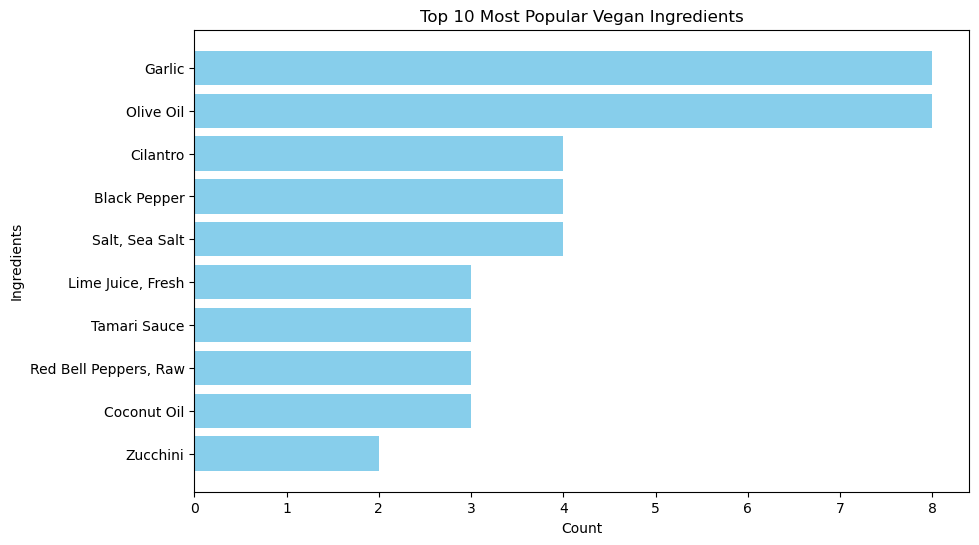

In [41]:
# Define the pipeline
pipeline = [
    {
        "$match": {
            "tags": {
                "$all": ["vegan"]  
            }
        }
    },
    {
        "$unwind": "$ingredients"  
    },
    
    {
        "$group": {
            "_id": "$ingredients.name",
            "count": {"$sum": 1}  
        }
    },
    {
        "$sort": {"count": -1}  
    },
    {"$limit": 10}  
]

popular_vegan_ingredients_cursor = lowrecipes.aggregate(pipeline)

popular_vegan_ingredients_list = list(popular_vegan_ingredients_cursor)

popular_vegan_ingredients_df = pd.DataFrame(popular_vegan_ingredients_list)

# The bar plot
plt.figure(figsize=(10, 6))
plt.barh(popular_vegan_ingredients_df['_id'], popular_vegan_ingredients_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ingredients')
plt.title('Top 10 Most Popular Vegan Ingredients')
plt.gca().invert_yaxis()  
plt.show()



Based on the data depicted in the graph, it is advisable to include the following ingredients in Olivia's essential shopping list.

### The Shortest Vegan Recipe 

In [74]:

recipe_order = ['name', 'tags', 'description', 'prepareTime', 'cookTime', 
                      'ingredients', 'steps', 'servings', 'nutrients', 'image']

match_stage = {
    "$match": {
        "tags": "vegan"  
    }
}

project_stage = {
    "$project": {
        "_id": 0,
        "name": 1,
        "tags": 1,
        "description": 1,
        "prepareTime": 1,
        "cookTime": 1,
        "ingredients": 1,
        "steps": 1,
        "servings": 1,
        "nutrients": 1,
        "image": 1,
        "step_count": {"$size": "$steps"}  
    }
}

sort_stage = {
    "$sort": {"step_count": 1}  
}

limit_stage = {
    "$limit": 1
}



# Assemble the pipeline
pipeline = [match_stage, project_stage, sort_stage, limit_stage]

cursor = lowrecipes.aggregate(pipeline)

shortest_vegan_recipe_df = pd.DataFrame(cursor)

shortest_vegan_recipe = shortest_vegan_recipe_df.reindex(columns=recipe_order)

shortest_vegan_recipe



,name,tags,description,prepareTime,cookTime,ingredients,steps,servings,nutrients,image
0,Keto Vegan Cilantro Lime Rice,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, pale...",Keto Cilantro Lime Rice is the perfect Keto side dish for any Keto or Low Ca...,0,0,"[{'name': 'Cauliflower rice', 'servingSize': {'units': 'oz', 'qty': 10.0, 'g...",[Place cauliflower rice into a medium-sized microwave-safe bowl. Microwave o...,4,"{'caloriesKCal': 19.12, 'caloriesKJ': 79.997, 'totalCarbs': 3.844, 'diabetes...",https://tinyurl.com/2p82zzca/df9fd021-4abe-4c34-8f46-484e74e71ac5.png


In [75]:
# Display the image from the DataFrame 
if 'image' in shortest_vegan_recipe_df.columns:
    for index, row in shortest_vegan_recipe_df.head(10).iterrows():  
        display(Image(url=row['image'], width=500, height=500))
else:
    print("No image column found in the DataFrame")

### Lukas

The requirements for the diet of Lukas:

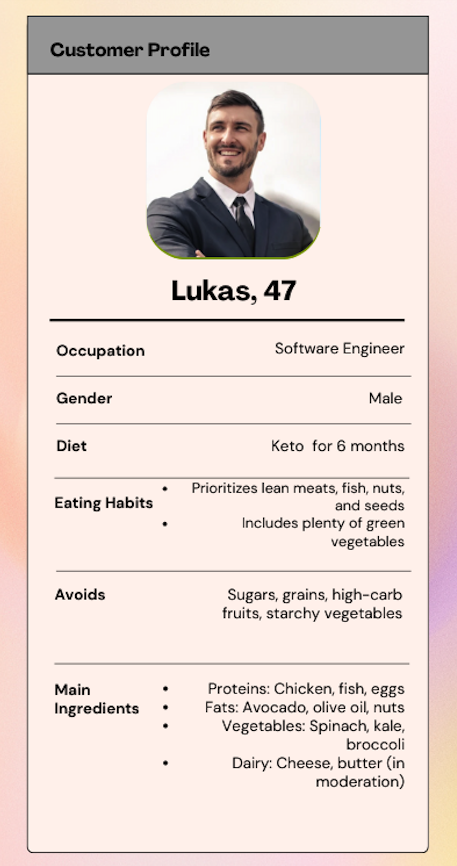

In [10]:
# Displaying the image of personnas created by Canvas
personnas_image_path = '/Users/elals/Desktop/Lukas.png'
display(Image(personnas_image_path))

### The Perfect Meals for Lukas

In [57]:
# Define the pipepline
keto_recipe_order = ['name', 'tags', 'description', 'prepareTime', 'cookTime', 
                     'ingredients', 'steps', 'servings', 'nutrients', 'image']


project = {
    "$project": {
        "_id": 0,
        "id": 1,
        "name": 1,
        "tags": 1,  
        "description": 1,
        "prepareTime": 1,
        "cookTime": 1,
        "ingredients": 1,  
        "steps": 1,  
        "servings": 1,
        "nutrients": 1,
        "image": 1
    }
}


match = {
    "$match": {
        "tags": "keto"  
    }
}


sort = {
    "$sort": {
        "name": 1  
    }
}


limit = {
    "$limit": 20
}

# Assemble the pipeline
pipeline = [match, project, sort, limit]

cursor = lowrecipes.aggregate(pipeline)

keto_recipes_df = pd.DataFrame(cursor)

keto_recipes_df = keto_recipes_df.reindex(columns=keto_recipe_order)

keto_recipes_df


,name,tags,description,prepareTime,cookTime,ingredients,steps,servings,nutrients,image
0,Easy Keto Spaghetti Sauce,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, keto...",With every spaghetti sauce on the market full of sugars or high fructose cor...,5,10,"[{'name': 'Extra Virgin Olive Oil', 'servingSize': {'units': 'tablespoon', '...",[Preheat a medium sized saute pan over medium-high heat until hot. Add the o...,15,"{'caloriesKCal': 37.718, 'caloriesKJ': 157.813, 'totalCarbs': 4.42, 'diabete...",https://tinyurl.com/2p82zzca/a7071e93-b32f-4b7c-8e56-421fff05edd5.png
1,Keto Bacon Wrapped Chicken Tenders with Parmesan,"[beef-free, fish-free, gluten-free, keto, lchf, peanut-free, relevant-meal--...",These keto chicken tenders are wrapped with bacon and a garlic parmesan mayo...,8,22,"[{'name': 'Chicken Tender, Raw', 'servingSize': {'units': 'tender', 'desc': ...",[Preheat the oven to 400 degrees Fahrenheit and line a shallow oven tray wit...,2,"{'caloriesKCal': 255.508, 'caloriesKJ': 579.518, 'totalCarbs': 1.105, 'diabe...",https://tinyurl.com/2p82zzca/a2892760-d225-4e4c-b3f3-288e30035e6d.png
2,Keto Bird Nests,"[beef-free, dairy-free, fish-free, gluten-free, keto, lchf, peanut-free, por...",This deliciously low-carb breakfast is light to eat and totally instagram-wo...,10,20,"[{'name': 'Zucchini', 'servingSize': {'units': 'ounce', 'desc': '8-½ ounce',...",[Preheat an oven to 350 degrees and line a sheet tray with aluminum foil or ...,4,"{'caloriesKCal': 114.047, 'caloriesKJ': 477.171, 'totalCarbs': 2.801, 'diabe...",https://tinyurl.com/2p82zzca/348b12ac-3cf3-44a7-b193-4c686a07c0f2.png
3,Keto Blue Cheese Dressing,"[beef-free, chicken-free, fish-free, gluten-free, keto, lchf, peanut-free, p...","This quick and easy blue cheese dressing is rich, creamy and perfect for add...",8,0,"[{'name': 'Water', 'servingSize': {'units': 'tablespoon', 'desc': '1 tablesp...","[Add the yogurt, mayonnaise and lemon juice to a mixing bowl. You may use a ...",4,"{'caloriesKCal': 211.721, 'caloriesKJ': 885.843, 'totalCarbs': 1.823, 'diabe...",https://tinyurl.com/2p82zzca/2a4fac4d-b935-4360-b72c-934e34895681.png
4,Keto Cheddar Bacon Wrapped Aspargus Bundles,"[beef-free, chicken-free, egg-free, fish-free, gluten-free, keto, kid-friend...","This ultimate easy Keto side dish recipe is cheesy, crispy, salty, hot, and ...",8,25,"[{'name': 'Asparagus, Raw', 'servingSize': {'units': 'ounce', 'desc': '2-¾ o...",[Preheat an oven to 375 degrees and line a sheet tray with parchment paper. ...,4,"{'caloriesKCal': 77.041, 'caloriesKJ': 322.339, 'totalCarbs': 1.006, 'diabet...",https://tinyurl.com/2p82zzca/356113a7-1cc9-448c-886f-4e67132b56f9.png
5,Keto Chocolate Crunch Ice Cream Bars,"[beef-free, chicken-free, desserts, egg-free, fish-free, gluten-free, keto, ...",These ice cream bars are filled with a super creamy no churn cream cheese ic...,320,0,"[{'name': 'Cream Cheese Spread', 'servingSize': {'units': 'ounce', 'desc': '...","[Add the erythritol to a food processor and blend until powdered., Add the c...",12,"{'caloriesKCal': 373.625, 'caloriesKJ': 1563.245, 'totalCarbs': 10.034, 'dia...",https://tinyurl.com/2p82zzca/fdb99406-aa1c-4f65-a976-42930add11e0.png
6,"Keto Chocolate, Orange and Ginger Smoothie","[beef-free, beverages, breakfast, chicken-free, dairy-free, egg-free, fish-f...",This delicious Keto smoothie is loaded with fats and flavor and is perfectly...,8,0,"[{'name': 'Almond Butter, Unsalted', 'servingSize': {'units': 'tablespoon', ...",[Scoop the chilled coconut cream from the top of the can of coconut milk and...,1,"{'caloriesKCal': 356.722, 'caloriesKJ': 1115.967, 'totalCarbs': 21.043, 'dia...",https://tinyurl.com/2p82zzca/a867707a-0cad-4a7a-99d6-7efc1d3f92a9.png
7,"Keto Chorizo, Spinach and Bell Pepper Zucchini Boats","[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, keto...","These flavorsome zucchini boats are loaded with smokey chorizo, tender baby ...",7,15,"[{'name': 'Fresh Food Spanish Chorizo 

The pictures of the first 10 meals 

In [58]:
# Display the image from the DataFrame for the first 10 meals
if 'image' in keto_recipes_df.columns:
    for index, row in keto_recipes_df.head(10).iterrows():  
        display(Image(url=row['image'], width=500, height=500))
else:
    print("No image column found in the DataFrame")

### The Most Popular Keto Ingredients 

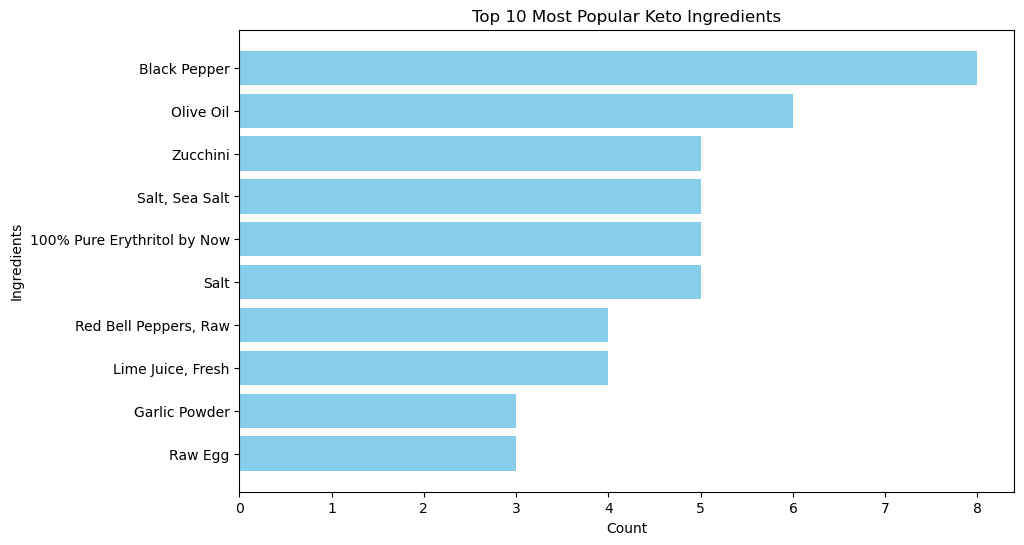

In [6]:
# Define the pipeline 
pipeline = [
    {
        "$match": {
            "tags": "keto"  
        }
    },
    {
        "$unwind": "$ingredients"  
    },
    {
        "$group": {
            "_id": "$ingredients.name",
            "count": {"$sum": 1}  
        }
    },
    {
        "$sort": {"count": -1}  
    },
    {"$limit": 10}  
]

# Execute the pipeline 
popular_keto_ingredients_cursor = lowrecipes.aggregate(pipeline)

popular_keto_ingredients_list = list(popular_keto_ingredients_cursor)

popular_keto_ingredients_df = pd.DataFrame(popular_keto_ingredients_list)

# The bar plot
plt.figure(figsize=(10, 6))
plt.barh(popular_keto_ingredients_df['_id'], popular_keto_ingredients_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ingredients')
plt.title('Top 10 Most Popular Keto Ingredients')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()


### The Shortest Keto Recipe 

In [76]:
recipe_order = ['name', 'tags', 'description', 'prepareTime', 'cookTime', 
                      'ingredients', 'steps', 'servings', 'nutrients', 'image']

match_stage = {
    "$match": {
        "tags": "keto"  
    }
}

project_stage = {
    "$project": {
        "_id": 0,
        "name": 1,
        "tags": 1,
        "description": 1,
        "prepareTime": 1,
        "cookTime": 1,
        "ingredients": 1,
        "steps": 1,
        "servings": 1,
        "nutrients": 1,
        "image": 1,
        "step_count": {"$size": "$steps"}  
    }
}

sort_stage = {
    "$sort": {"step_count": 1}  
}


limit_stage = {
    "$limit": 1
}



# Assemble the pipeline
pipeline = [match_stage, project_stage, sort_stage, limit_stage]

cursor = lowrecipes.aggregate(pipeline)

shortest_keto_recipe_df = pd.DataFrame(cursor)

shortest_keto_recipe = shortest_keto_recipe_df.reindex(columns=recipe_order)

shortest_keto_recipe



,name,tags,description,prepareTime,cookTime,ingredients,steps,servings,nutrients,image
0,Keto Stir Fried Bell Peppers with Capers and Olives,"[beef-free, chicken-free, dairy-free, egg-free, fish-free, gluten-free, keto...",These simple stir fried peppers are cooked until soft and tender with salty ...,5,8,"[{'name': 'Black Olives', 'servingSize': {'units': 'medium', 'desc': '8 medi...",[Slice the bell peppers into thin strips. Heat the oil in a skillet over a m...,3,"{'caloriesKCal': 91.258, 'caloriesKJ': 381.822, 'totalCarbs': 4.948, 'diabet...",https://tinyurl.com/2p82zzca/01c3c96f-5d3b-4d0b-b870-9f29c20eef10.png


In [77]:
# Display the image from the DataFrame 
if 'image' in shortest_keto_recipe_df.columns:
    for index, row in shortest_keto_recipe_df.head(10).iterrows():  
        display(Image(url=row['image'], width=500, height=500))
else:
    print("No image column found in the DataFrame")

### Recipe Complexity

Studying prepare time and cook time in recipes tells us how complex a recipe is, what cooking methods it uses, which ingredients need more time, how efficient the recipe is, and about cultural cooking differences. It helps us understand cooking better.

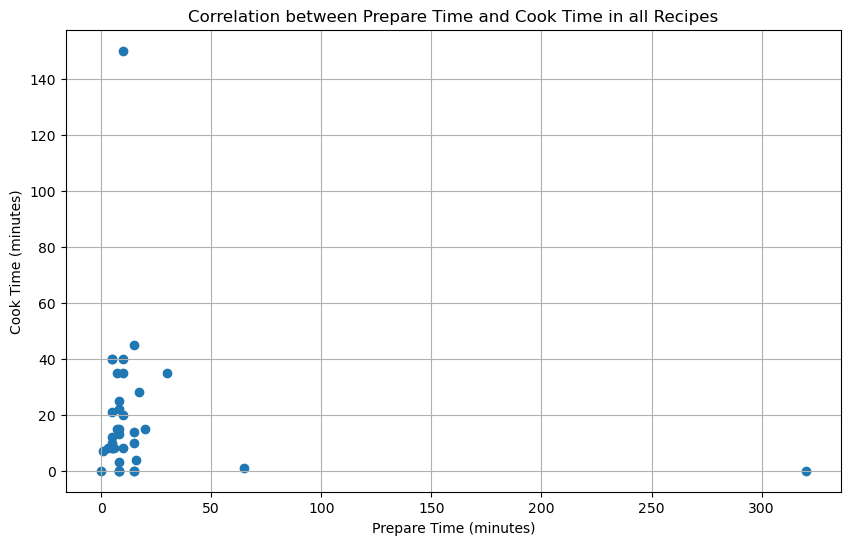

In [70]:
# Define a query 
query = {
    "prepareTime": {"$exists": True},
    "cookTime": {"$exists": True}
}
projection = {
    "prepareTime": 1,
    "cookTime": 1,
    "_id": 0
}


data_cursor = lowrecipes.find(query, projection)

data_list = list(data_cursor)

df = pd.DataFrame(data_list)

# The scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['prepareTime'], df['cookTime'])
plt.xlabel('Prepare Time (minutes)')
plt.ylabel('Cook Time (minutes)')
plt.title('Correlation between Prepare Time and Cook Time in all Recipes')
plt.grid(True)
plt.show()

This spread suggests that there may not be a strong linear correlation between prepare time and cook time for the dataset represented.

I'm incredibly curious to discover what kind of meal demands over 300 minutes of preparation.

In [82]:

recipe_order = ['name', 'tags', 'description', 'prepareTime', 'cookTime', 
                     'ingredients', 'steps', 'servings', 'nutrients', 'image']
# Define the pipeline

pipeline = [
    {
        "$match": {
            "prepareTime": {"$gt": 300}  
        }
    },
    {
        "$project": {
            "name": 1,
            "description": 1,
            "prepareTime": 1,
            "cookTime": 1,
            "ingredients": 1,
            "steps": 1,
            "servings": 1,
            "nutrients": 1,
            "image": 1
        }
    },
    {"$limit": 1} 
]

# Execute the pipeline
cursor = lowrecipes.aggregate(pipeline)

recipes_df = pd.DataFrame(cursor)

recipes_df = recipes_df.reindex(columns=recipe_order)

recipes_df



,name,tags,description,prepareTime,cookTime,ingredients,steps,servings,nutrients,image
0,Keto Chocolate Crunch Ice Cream Bars,NaN,These ice cream bars are filled with a super creamy no churn cream cheese ic...,320,0,"[{'name': 'Cream Cheese Spread', 'servingSize': {'units': 'ounce', 'desc': '...","[Add the erythritol to a food processor and blend until powdered., Add the c...",12,"{'caloriesKCal': 373.625, 'caloriesKJ': 1563.245, 'totalCarbs': 10.034, 'dia...",https://tinyurl.com/2p82zzca/fdb99406-aa1c-4f65-a976-42930add11e0.png


In [83]:
# Show me the picture of this meal: 

if 'image' in recipes_df.columns:
    for index, row in recipes_df.iterrows():
        display(Image(url=row['image'], width=500, height=500))
else:
    print("No image column found in the DataFrame")

## Conclusions

### Summary

After examining the data, it's clear that MongoDB can be handy for creating custom pipelines tailored to specific groups, like Olivia's preferences and Lukas's requirements. However, certain aspects, like certain characteristics, serving, and nutrients, weren't thoroughly analyzed. While other factors were studied in detail. 

Unfortunately, over 3800 recipes were found to have duplicate entries in the database, and they had to be removed. It was indeed disappointing to discover such a large number of duplicates.

Additionally, it's worth noting that MongoDB pipelines might not be the best way for end-users to interact with the data. An interface like an interactive dashboard in Tableau could be more user-friendly, allowing users like Olivia and Lukas to customize queries with filters and drop-down menus, providing a more intuitive way for them to access and analyze the data according to their needs.


### Reflection and Learnings

Despite its usefulness, we discovered some weaknesses in the data structure that affect how easy it is for users to find what they're looking for.

Furthermore, the importance of having a fast internet connection became evident during the analysis. Also, it was not possible to see the dataset before fetching the data, which made it impossible to predict the presence of many duplicate values. Additionally, due to the limit of requests, it was not possible to fetch more data. Having the ability to access and preview the dataset before fetching the data would be beneficial in identifying potential issues like duplicates. Moreover, increasing the limit of requests would enable the retrieval of more data, facilitating the creation of additional personas and offering them the possibility to plan a meal for each day of the week. Additionally, this dataset opens up the possibility of counting calories and approximating the intake for a more comprehensive meal planning experience.

Overall, this project has been a tremendous learning experience for me. From data transformation and cleaning to analysis, each step has been immensely gratifying.  

### Next Steps

If the project were to continue, I am eager to further refine the data structure and expand the dataset. My goal would be to gather additional data to explore and create meal plans tailored to specific dietary requirements for an extended period, perhaps even for a month. This would involve incorporating more variables such as age, height, weight, and nutrition goals to cater to a diverse range of personsas. By doing so, we could offer more personalized and comprehensive meal planning options to users.